<a href="https://colab.research.google.com/github/minhbao1705/Exercise/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/weather.csv")

max: Nhiệt độ tối đa, tính bằng độ C.

min: Nhiệt độ tối thiểu, tính bằng độ C.

wind: Tốc độ gió, tính bằng km/h.

wind_d: Hướng gió, tính bằng độ.

rain: Lượng mưa, tính bằng mm.

humidi: Độ ẩm tương đối, tính bằng phần trăm.

cloud: Mức độ che phủ của mây, tính bằng phần trăm.

pressure: Áp suất khí quyển, tính bằng hPa.

date: Ngày, tháng, năm.

province: Tỉnh thành.

In [ ]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


In [ ]:
countries = df['province']
print(countries.unique())
print('Amount of Countries in data:', len(countries.unique()))

['Bac Lieu' 'Ho Chi Minh City' 'Tam Ky' 'Ben Tre' 'Hoa Binh' 'Tan An'
 'Bien Hoa' 'Hong Gai' 'Thai Nguyen' 'Buon Me Thuot' 'Hue' 'Thanh Hoa'
 'Ca Mau' 'Long Xuyen' 'Tra Vinh' 'Cam Pha' 'My Tho' 'Tuy Hoa' 'Cam Ranh'
 'Nam Dinh' 'Uong Bi' 'Can Tho' 'Nha Trang' 'Viet Tri' 'Chau Doc'
 'Phan Rang' 'Vinh' 'Da Lat' 'Phan Thiet' 'Vinh Long' 'Ha Noi' 'Play Cu'
 'Vung Tau' 'Hai Duong' 'Qui Nhon' 'Yen Bai' 'Hai Phong' 'Rach Gia'
 'Hanoi' 'Soc Trang']
Amount of Countries in data: 40


In [ ]:
province = "Ho Chi Minh City"
df_data = df[df['province'] == 'Ho Chi Minh City']

In [ ]:
df_data = df_data.drop(['wind_d'], axis=1)

In [ ]:
# Calculate the average temperature
df_data["temp"] = (df_data["max"] + df_data["min"]) / 2
df_data = df_data.drop(['max', 'min'], axis=1)
# Thay vị trí của nhiệt độ trung bình
df_data = df_data[['province', "temp"] + list(df_data)[2:7]]

In [ ]:
df_data = df_data.sort_values(by='date', ascending=True)
df_data.head()

,province,temp,rain,humidi,cloud,pressure,date
4501,Ho Chi Minh City,25.5,18.5,89,68,1010,2009-01-01
4718,Ho Chi Minh City,25.0,1.8,83,62,1011,2009-01-02
4514,Ho Chi Minh City,23.5,7.2,87,68,1012,2009-01-03
4527,Ho Chi Minh City,25.0,0.5,83,40,1011,2009-01-04
4564,Ho Chi Minh City,26.0,0.0,77,29,1011,2009-01-05


In [ ]:
print(df_data.sort_values(by='date', ascending=False))

              province  temp  rain  humidi  cloud  pressure        date
6706  Ho Chi Minh City  30.0   2.9      71     51      1009  2021-06-18
6667  Ho Chi Minh City  29.5   8.8      74     53      1009  2021-06-17
6654  Ho Chi Minh City  30.0   6.9      70     60      1009  2021-06-16
6792  Ho Chi Minh City  29.5   0.0      70     32      1008  2021-06-15
6901  Ho Chi Minh City  29.0   2.0      72     70      1009  2021-06-14
...                ...   ...   ...     ...    ...       ...         ...
4564  Ho Chi Minh City  26.0   0.0      77     29      1011  2009-01-05
4527  Ho Chi Minh City  25.0   0.5      83     40      1011  2009-01-04
4514  Ho Chi Minh City  23.5   7.2      87     68      1012  2009-01-03
4718  Ho Chi Minh City  25.0   1.8      83     62      1011  2009-01-02
4501  Ho Chi Minh City  25.5  18.5      89     68      1010  2009-01-01

[4549 rows x 7 columns]


## **1. Data visualization**

In [ ]:
from datetime import datetime, date

df_data['date'] = pd.to_datetime(df_data['date'], format = '%Y/%m/%d')
df_data.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,province,temp,rain,humidi,cloud,pressure,date
4501,Ho Chi Minh City,25.500000,18.500000,89,68,1010,2009-01-01 00:00:00
4718,Ho Chi Minh City,25.000000,1.800000,83,62,1011,2009-01-02 00:00:00
4514,Ho Chi Minh City,23.500000,7.200000,87,68,1012,2009-01-03 00:00:00
4527,Ho Chi Minh City,25.000000,0.500000,83,40,1011,2009-01-04 00:00:00
4564,Ho Chi Minh City,26.000000,0.000000,77,29,1011,2009-01-05 00:00:00


<ipython-input-11-7166d450239b>:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  for i, column in enumerate((df_data.drop('date', axis=1).columns) & (df_data.drop('province', axis=1).columns)):


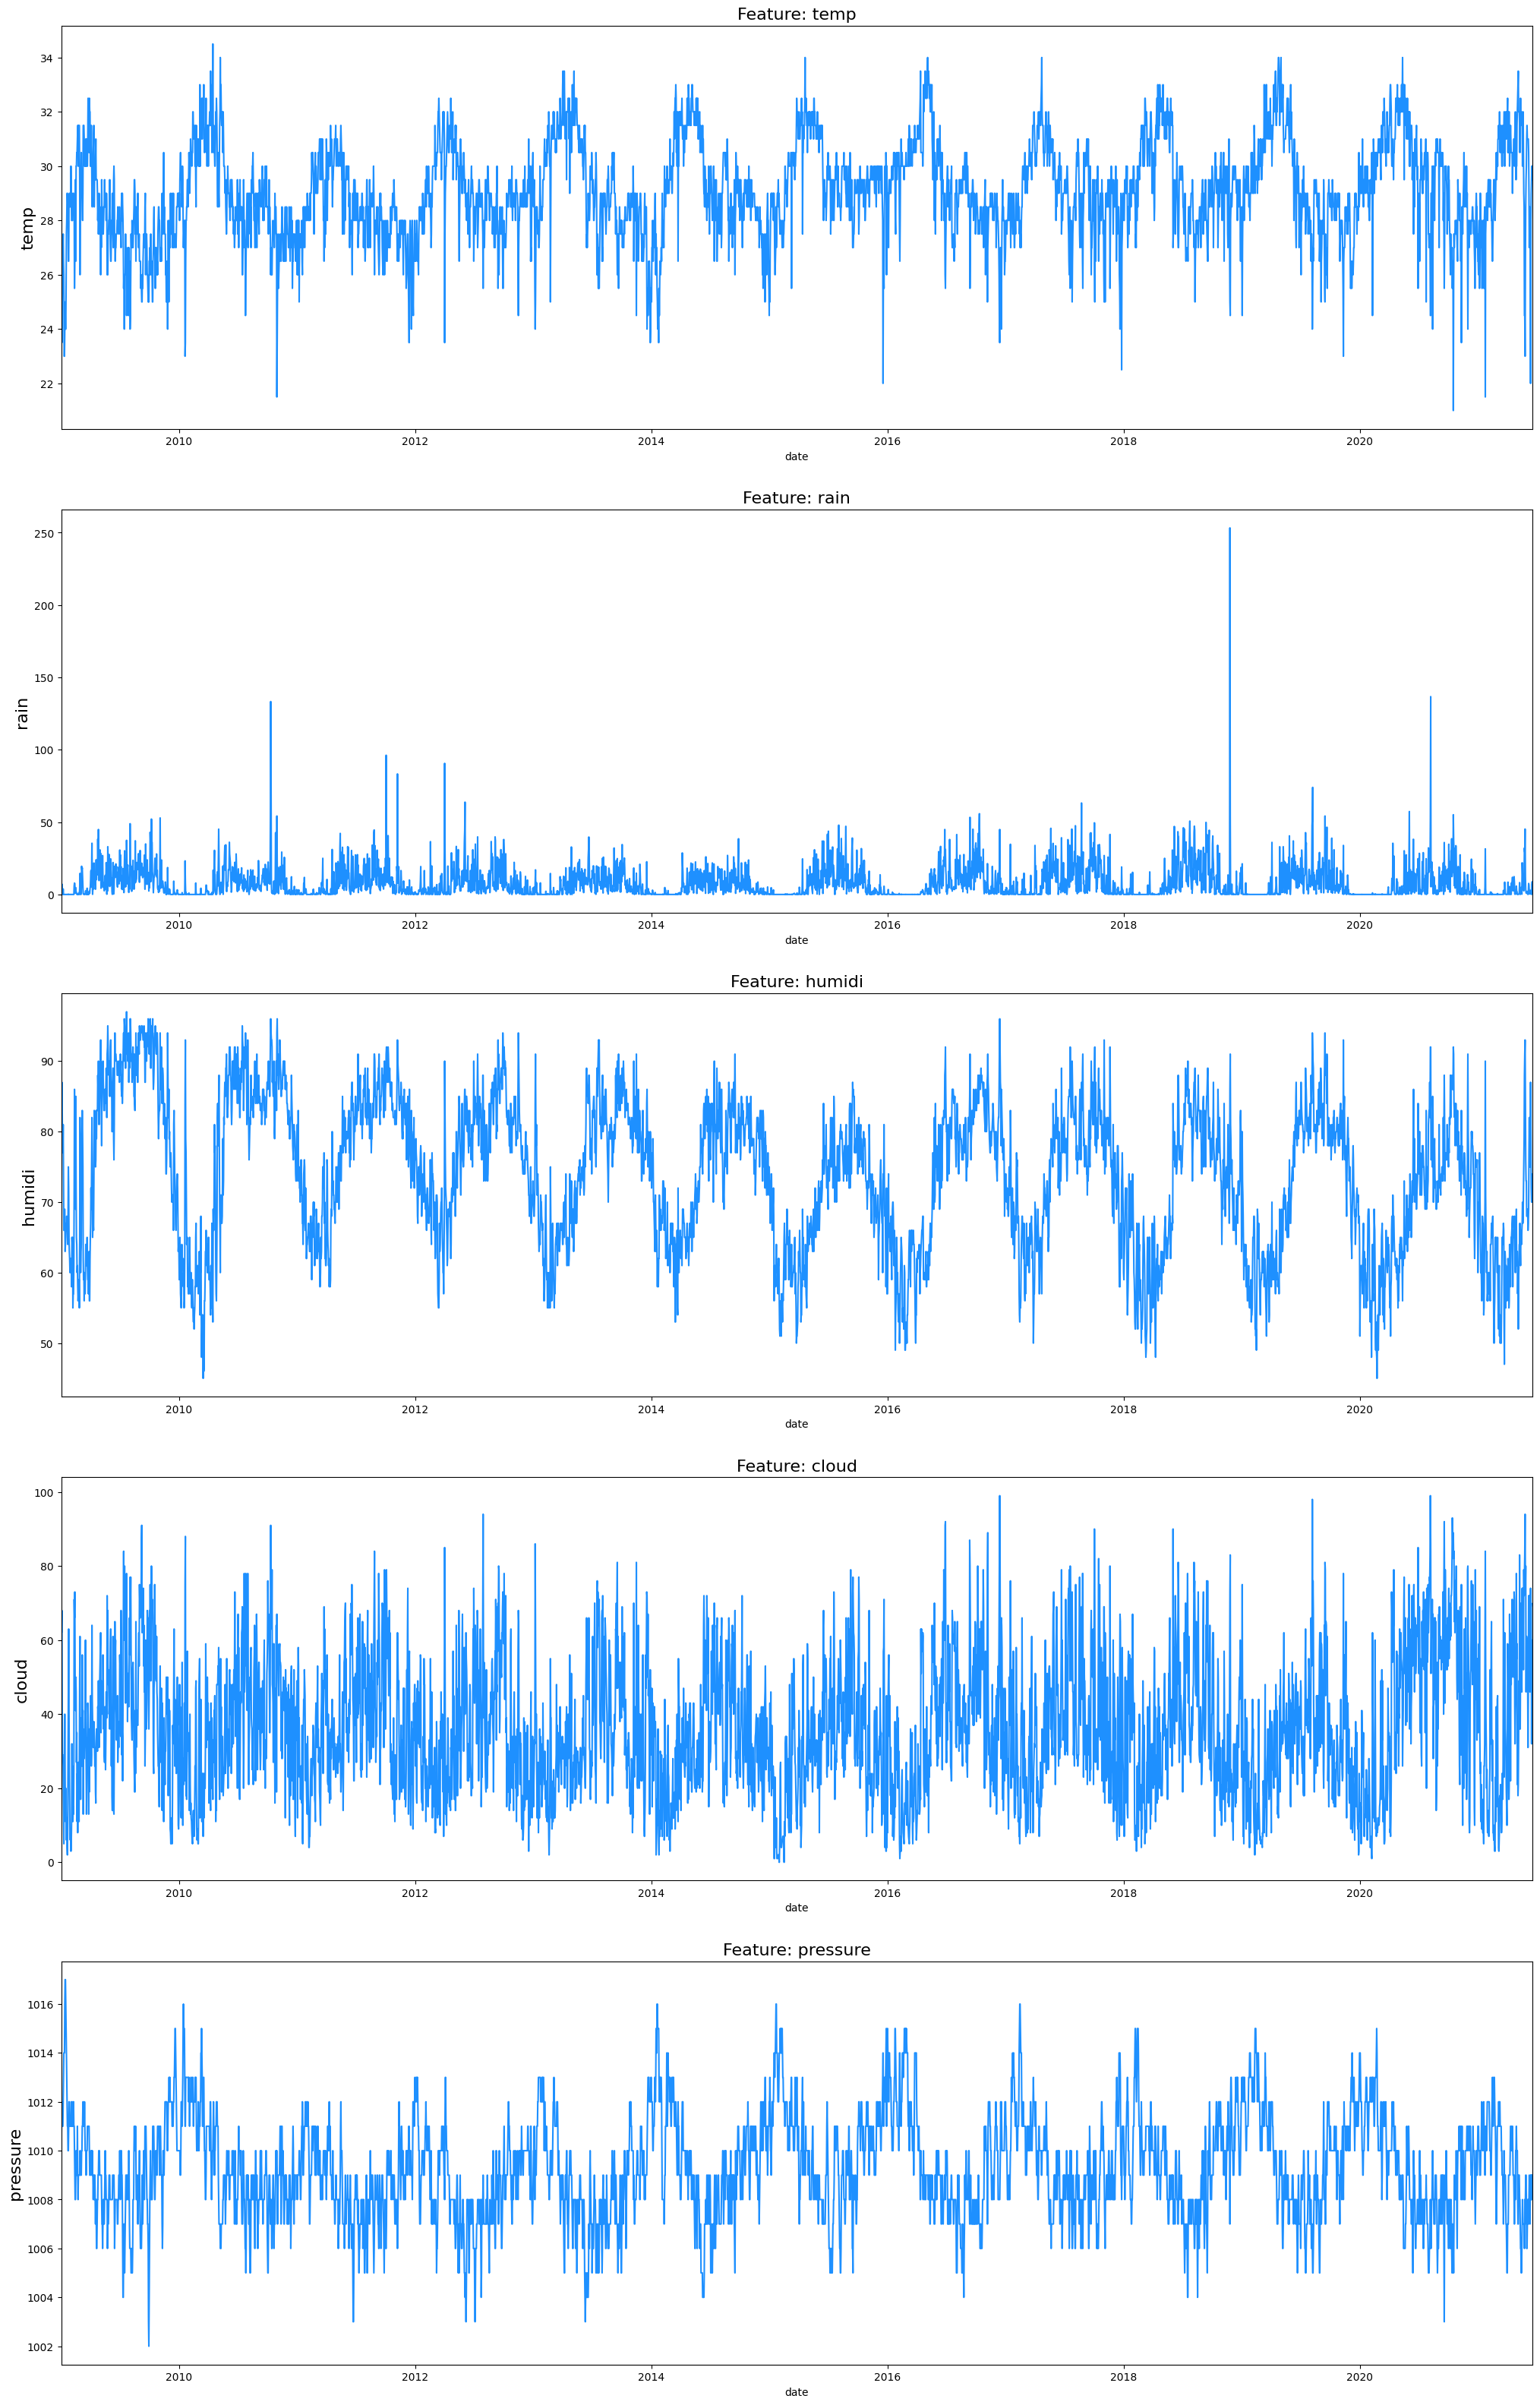

In [ ]:
# To complete the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(25, 40))
for i, column in enumerate((df_data.drop('date', axis=1).columns) & (df_data.drop('province', axis=1).columns)):
  sns.lineplot(x=df_data['date'], y=df_data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
  ax[i].set_title('Feature: {}'.format(column), fontsize=16)
  ax[i].set_ylabel(ylabel=column, fontsize=16)
  ax[i].set_xlim([date(2009, 1, 1), date(2021, 6, 18)])

## **2. Data Preprocessing**

In [ ]:
df_data = df_data.sort_values(by='date', ascending=True)

# Check time intervals
df_data['delta'] = df_data['date'] - df_data['date'].shift(1)

df_data[['date', 'delta']].head()

,date,delta
4501,2009-01-01,NaT
4718,2009-01-02,1 days
4514,2009-01-03,1 days
4527,2009-01-04,1 days
4564,2009-01-05,1 days


In [ ]:
df_data['delta'].sum(), df_data['delta'].count()

(Timedelta('4551 days 00:00:00'), 4548)

## **2.1 Handle Missings**

In [ ]:
df_data = df_data.drop('delta', axis=1)
df.isna().sum()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

(14245.0, 18796.0)

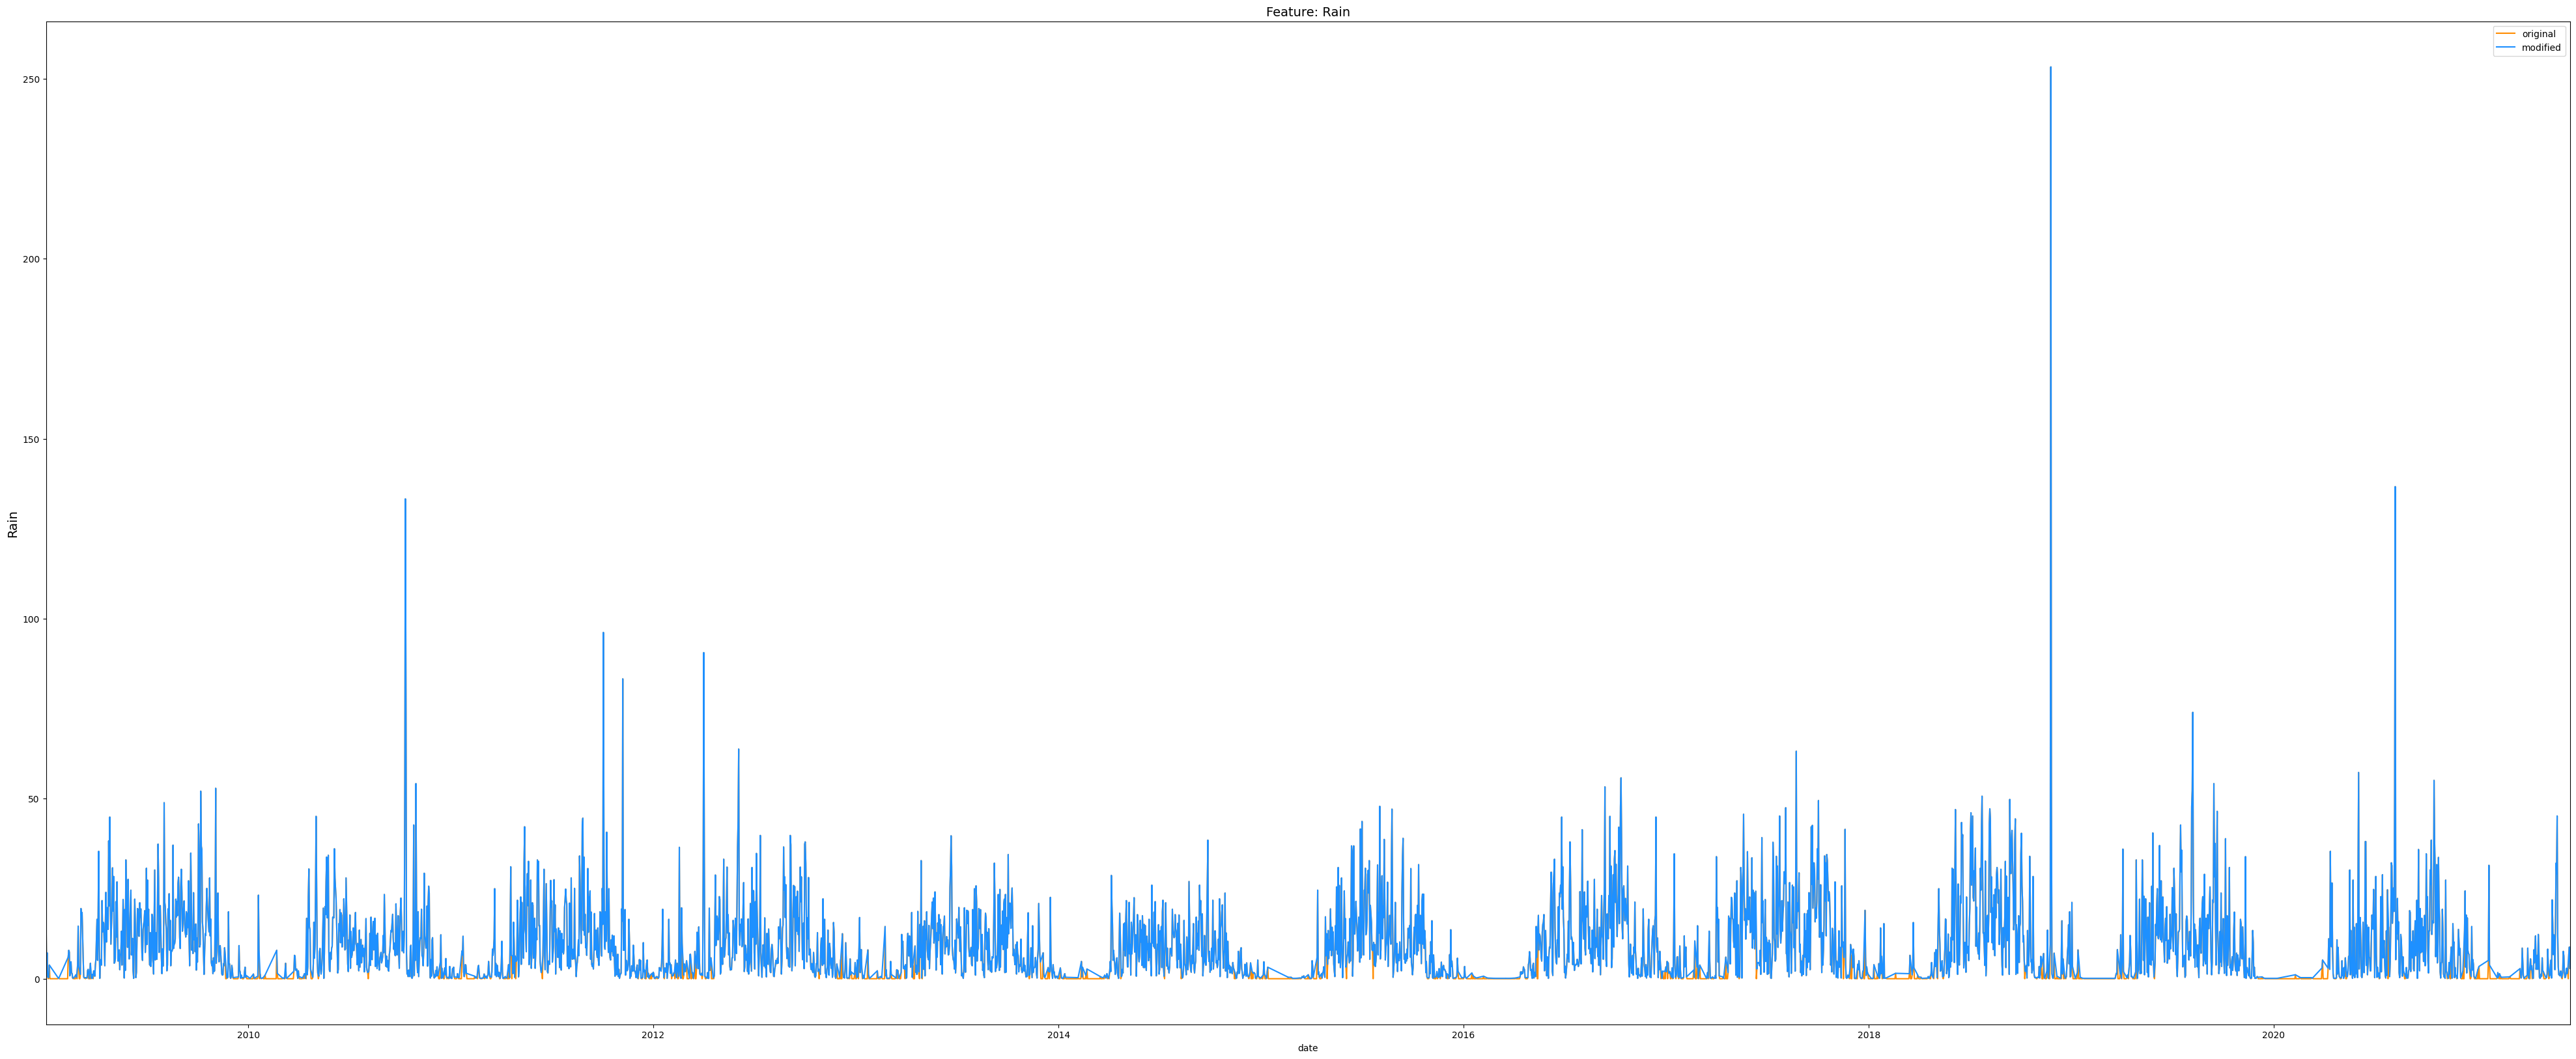

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20))

old_rain = df_data['rain'].copy()
df_data['rain'] = df_data['rain'].replace(0, np.nan)

sns.lineplot(x=df_data['date'], y=old_rain, color='darkorange', label='original')
sns.lineplot(x=df_data['date'], y=df_data['rain'].fillna(np.inf), color='dodgerblue', label='modified')
ax.set_title('Feature: Rain', fontsize=14)
ax.set_ylabel(ylabel='Rain', fontsize=14)
ax.set_xlim([date(2009, 1, 1), date(2021, 6, 18)])

<ipython-input-16-ac308f77e6ef>:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


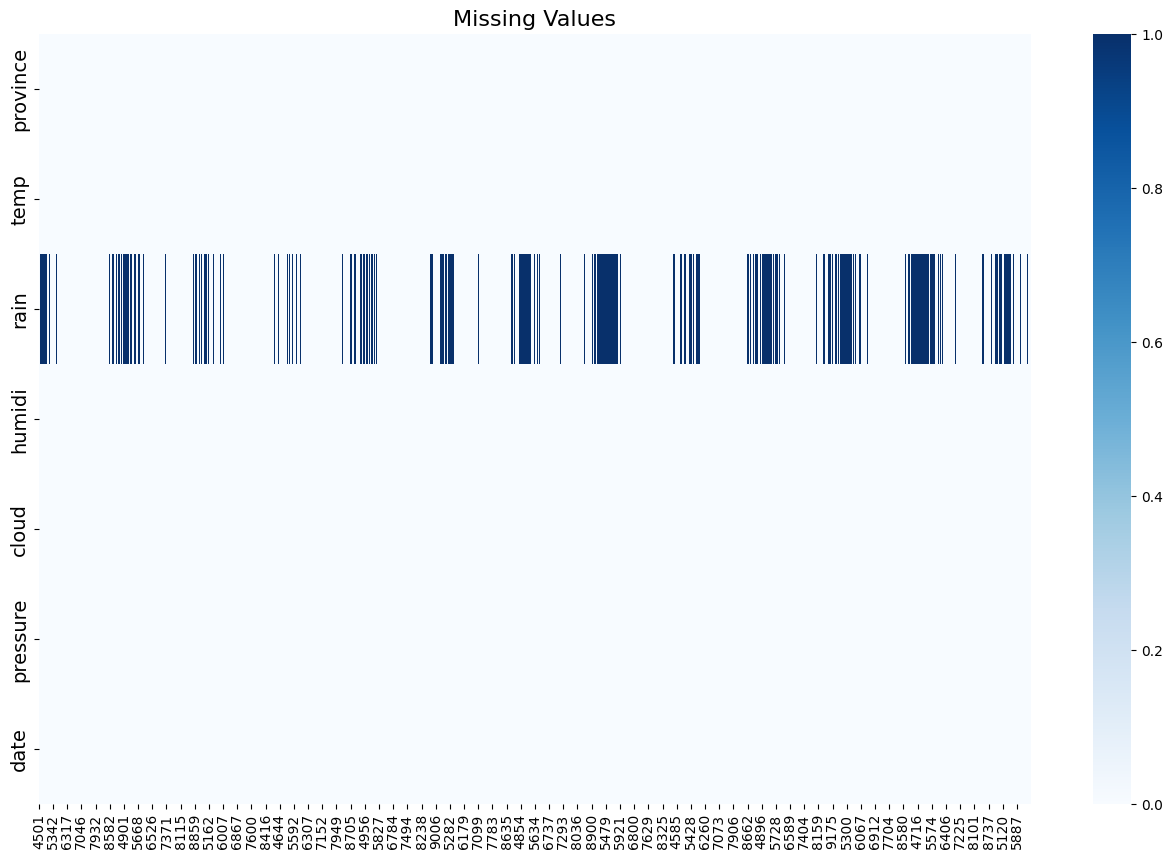

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))

sns.heatmap(df_data.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

plt.show()

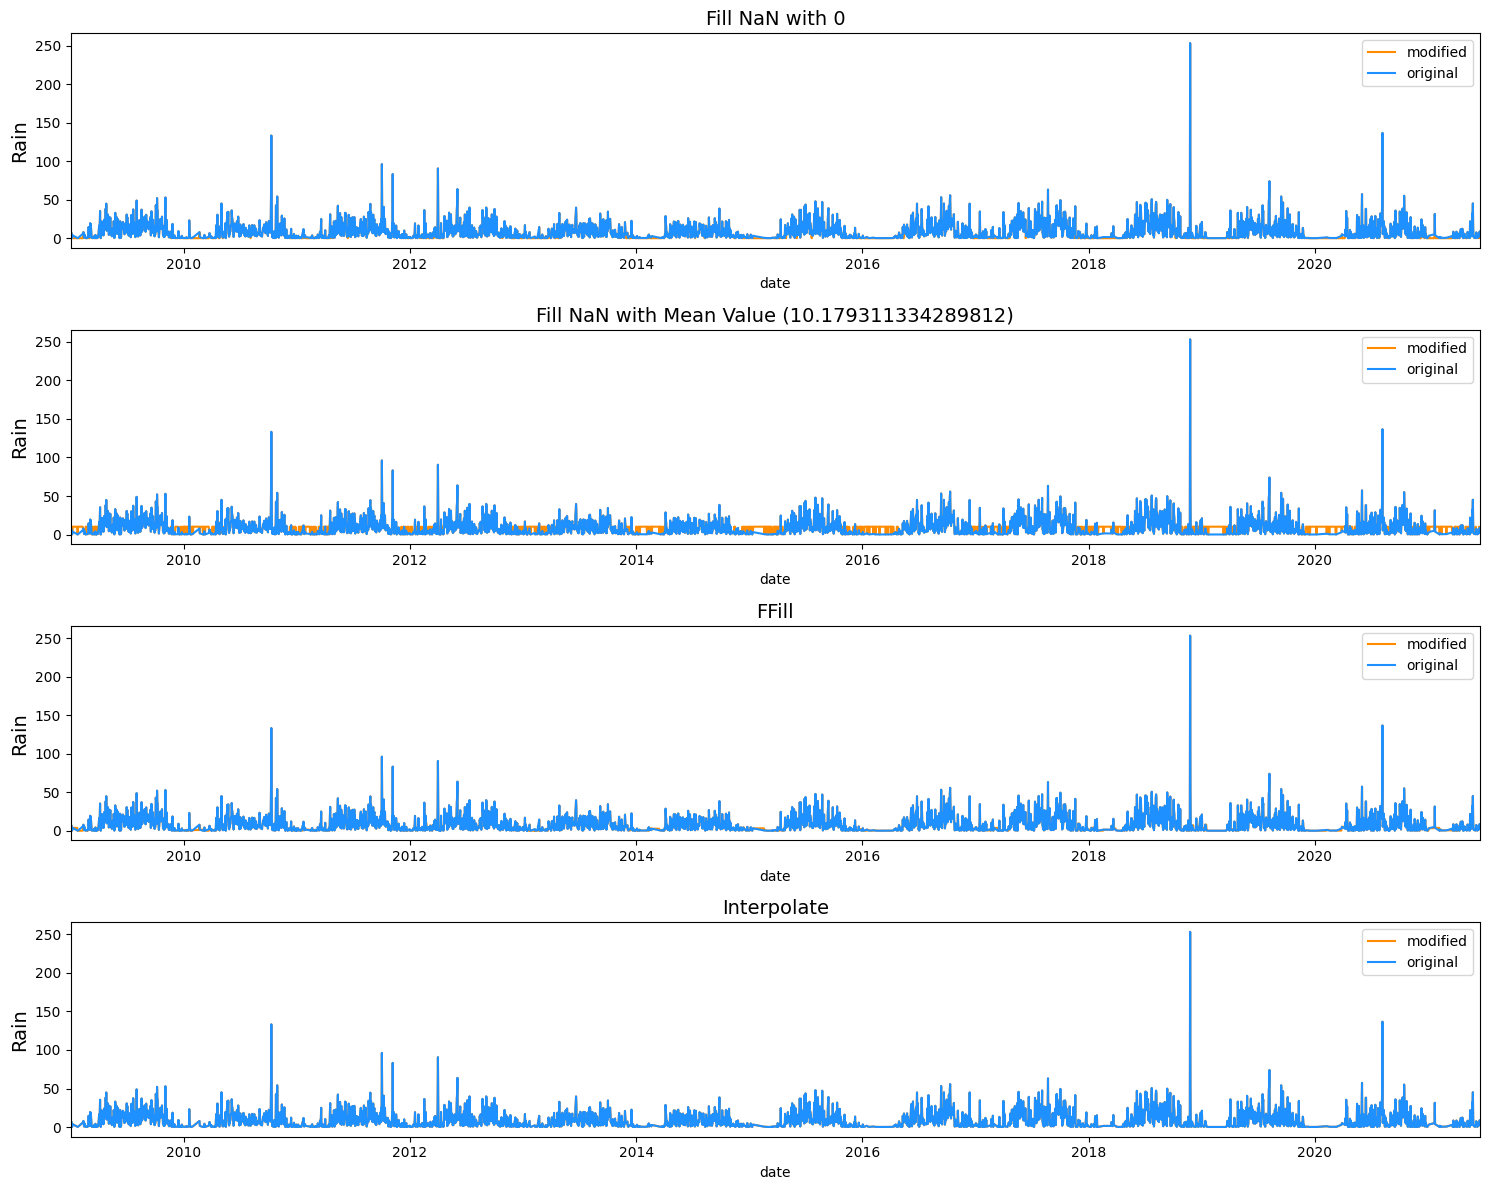

In [ ]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df_data['date'], y=df_data['rain'].fillna(0), ax=ax[0], color='darkorange', label='modified')
sns.lineplot(x=df_data['date'], y=df_data['rain'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Rain', fontsize=14)

mean_rain = df_data['rain'].mean()
sns.lineplot(x=df_data['date'], y=df_data['rain'].fillna(mean_rain), ax=ax[1], color='darkorange', label='modified')
sns.lineplot(x=df_data['date'], y=df_data['rain'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_rain})', fontsize=14)
ax[1].set_ylabel(ylabel='Rain', fontsize=14)

sns.lineplot(x=df_data['date'], y=df_data['rain'].ffill(), ax=ax[2], color='darkorange', label='modified')
sns.lineplot(x=df_data['date'], y=df_data['rain'].fillna(np.inf), ax=ax[2], color='dodgerblue', label='original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Rain', fontsize=14)

sns.lineplot(x=df_data['date'], y=df_data['rain'].interpolate(), ax=ax[3], color='darkorange', label='modified')
sns.lineplot(x=df_data['date'], y=df_data['rain'].fillna(np.inf), ax=ax[3], color='dodgerblue', label='original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Rain', fontsize=14)

for i in range(4):
  ax[i].set_xlim([date(2009, 1, 1), date(2021, 6, 18)])

plt.tight_layout()
plt.show()

In [ ]:
# interpolate missing values
df_data['rain'] = df_data['rain'].interpolate()

In [ ]:
df_data.head(20)

,province,temp,rain,humidi,cloud,pressure,date
4501,Ho Chi Minh City,25.5,18.500,89,68,1010,2009-01-01
4718,Ho Chi Minh City,25.0,1.800,83,62,1011,2009-01-02
4514,Ho Chi Minh City,23.5,7.200,87,68,1012,2009-01-03
4527,Ho Chi Minh City,25.0,0.500,83,40,1011,2009-01-04
4564,Ho Chi Minh City,26.0,0.400,77,29,1011,2009-01-05
4577,Ho Chi Minh City,27.0,0.300,77,29,1011,2009-01-06
4603,Ho Chi Minh City,27.5,3.800,81,26,1012,2009-01-07
4590,Ho Chi Minh City,26.5,3.575,74,14,1013,2009-01-08
4692,Ho Chi Minh City,26.0,3.350,66,5,1014,2009-01-09
4628,Ho Chi Minh City,23.0,3.125,66,26,1014,2009-01-10


## **2.2 Smoothing data/Resampling**

Resampling can provide additional information on the data. There are two types of resampling:

* **Upsampling** is when the frequency of samples is increased (e.g. days to hours)
* **Downsampling** is when the frequency of samples is decreased (e.g. days to weeks)

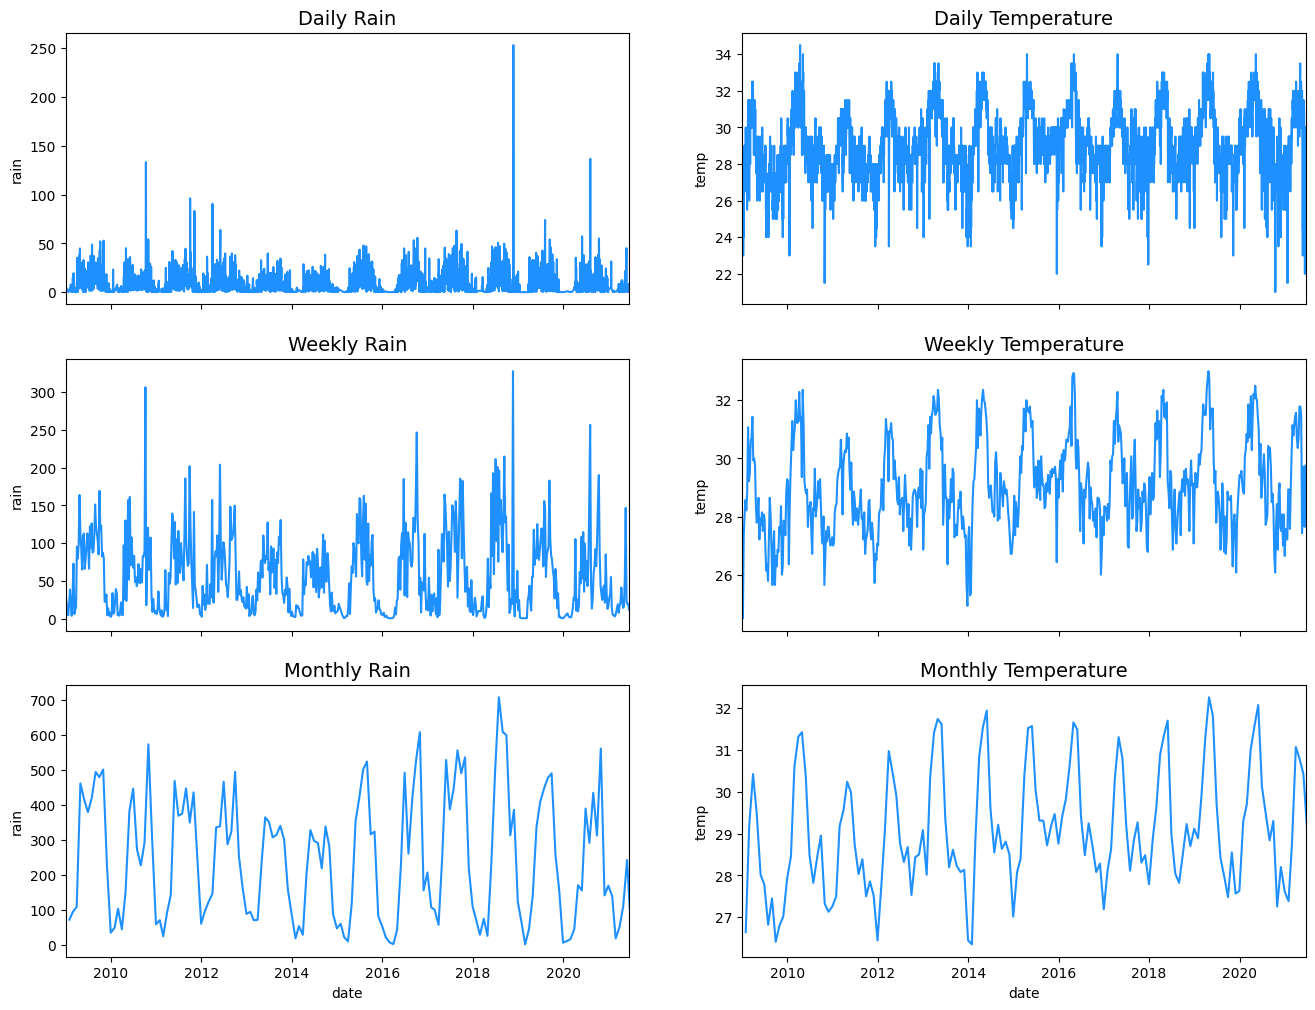

In [ ]:
fix, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16, 12))

sns.lineplot(x=df_data['date'], y=df_data['rain'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Daily Rain', fontsize=14)

resampled_df = df_data[['date', 'rain']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['rain'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Rain', fontsize=14)

resampled_df = df_data[['date','rain']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['rain'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Rain', fontsize=14)

for i in range(3):
  ax[i, 0].set_xlim([date(2009, 1, 1), date(2021, 6, 18)])

sns.lineplot(x=df_data['date'], y=df_data['temp'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature', fontsize=14)

resampled_df = df_data[['date', 'temp']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['temp'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature', fontsize=14)

resampled_df = df_data[['date','temp']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['temp'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature', fontsize=14)

for i in range(3):
  ax[i,1].set_xlim([date(2009, 1, 1), date(2021, 6, 18)])

plt.show()

In [ ]:
# downsample to weekly could smooth the data and help with analysis
downsample = df_data[['temp',
                      'rain',
                      'humidi',
                      'cloud',
                      'pressure'	,
                      'date'
                      ]].resample('7D', on='date').mean().reset_index(drop=False)

df_data = downsample.copy()
df_data.head(10)

,date,temp,rain,humidi,cloud,pressure
0,2009-01-01,25.642857,4.642857,82.428571,46.000000,1011.142857
1,2009-01-08,24.500000,2.900000,67.285714,20.714286,1015.000000
2,2009-01-15,27.357143,1.325000,66.142857,9.285714,1013.142857
3,2009-01-22,28.071429,0.656513,66.285714,31.857143,1011.000000
4,2009-01-29,28.571429,2.876471,61.857143,12.142857,1011.285714
5,2009-02-05,28.214286,5.527731,64.714286,32.428571,1011.142857
6,2009-02-12,28.857143,2.642857,72.000000,45.571429,1009.000000
7,2009-02-19,31.071429,0.550000,58.285714,16.857143,1009.142857
8,2009-02-26,29.214286,4.292857,65.428571,36.571429,1009.142857
9,2009-03-05,29.500000,10.414286,73.857143,34.000000,1011.000000


# **3. Feature engineering**

In [ ]:
df_data['year'] = pd.DatetimeIndex(df_data['date']).year
df_data['month'] = pd.DatetimeIndex(df_data['date']).month
df_data['day'] = pd.DatetimeIndex(df_data['date']).day
df_data['day_of_year'] = pd.DatetimeIndex(df_data['date']).dayofyear
df_data['week_of_year'] = pd.DatetimeIndex(df_data['date']).weekofyear
df_data['quarter'] = pd.DatetimeIndex(df_data['date']).quarter
df_data['season'] = df_data['month'] % 12 // 3 + 1

df_data[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

<ipython-input-23-3ae32b607d5d>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_data['week_of_year'] = pd.DatetimeIndex(df_data['date']).weekofyear


,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2009-01-01,2009,1,1,1,1,1,1
1,2009-01-08,2009,1,8,8,2,1,1
2,2009-01-15,2009,1,15,15,3,1,1
3,2009-01-22,2009,1,22,22,4,1,1
4,2009-01-29,2009,1,29,29,5,1,1


## **3.1 TimeSeries Decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns = [
    'temp', 'rain', 'humidi', 'cloud', 'pressure'
]

for column in core_columns:
  decomp = seasonal_decompose(df_data[column], period=52, model='additive', extrapolate_trend='freq')
  df_data[f'{column}_trend'] = decomp.trend
  df_data[f'{column}_seasonal'] = decomp.seasonal

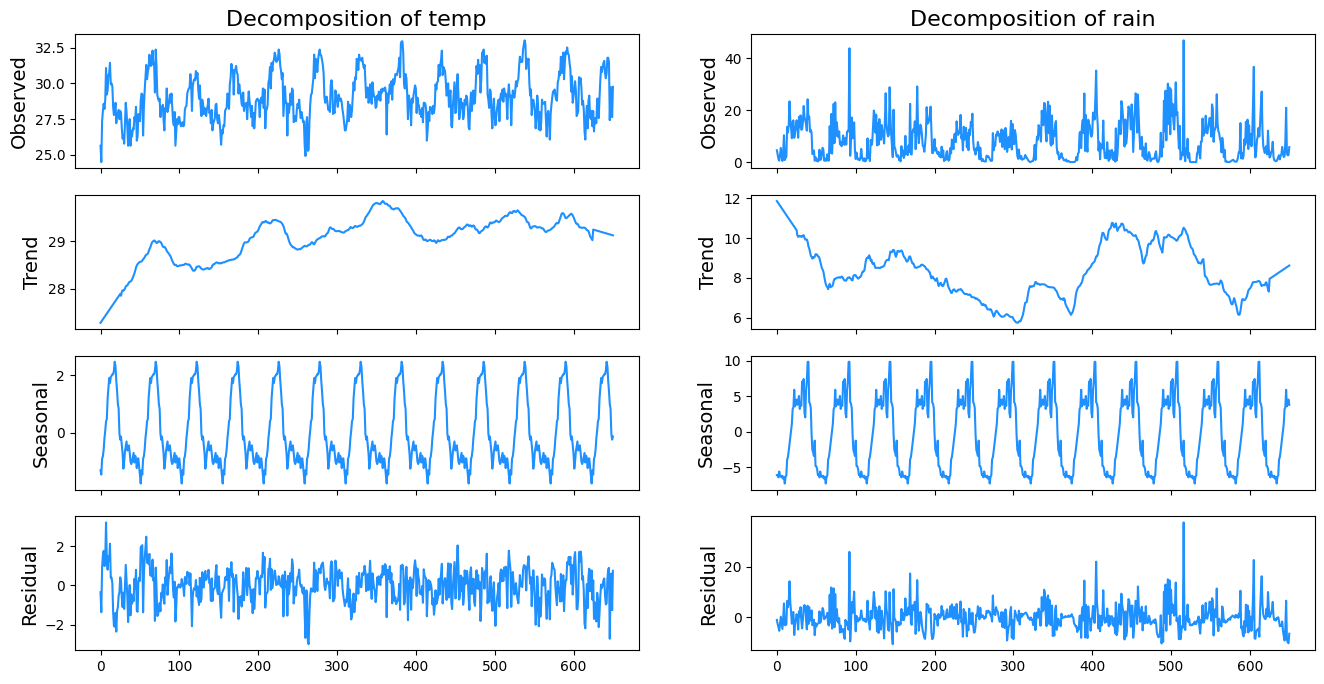

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 8))

for i, column in enumerate(['temp', 'rain']):

  res = seasonal_decompose(df_data[column], period=52, model='additive', extrapolate_trend='freq')

  ax[0, i].set_title('Decomposition of {}'.format(column), fontsize=16)
  res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
  ax[0,i].set_ylabel('Observed', fontsize=14)
  res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
  ax[1,i].set_ylabel('Trend', fontsize=14)

  res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
  ax[2,i].set_ylabel('Seasonal', fontsize=14)

  res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
  ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [ ]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df_data['temp']), index=df_data['date'], columns=['temp'])
data['temp'].max()
print(data)

                 temp
date                 
2009-01-01  25.642857
2009-01-08  24.500000
2009-01-15  27.357143
2009-01-22  28.071429
2009-01-29  28.571429
...               ...
2021-05-20  27.428571
2021-05-27  29.714286
2021-06-03  29.714286
2021-06-10  27.642857
2021-06-17  29.750000

[651 rows x 1 columns]


In [ ]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [ ]:
data_scaled

array([[-0.73109244],
       [-1.        ],
       [-0.32773109],
       [-0.15966387],
       [-0.04201681],
       [-0.12605042],
       [ 0.02521008],
       [ 0.54621849],
       [ 0.1092437 ],
       [ 0.17647059],
       [ 0.42857143],
       [ 0.46218487],
       [ 0.6302521 ],
       [ 0.27731092],
       [ 0.29411765],
       [ 0.24369748],
       [-0.09243697],
       [-0.22689076],
       [-0.15966387],
       [-0.02521008],
       [-0.36134454],
       [-0.19327731],
       [-0.24369748],
       [-0.14285714],
       [-0.29411765],
       [-0.15966387],
       [-0.19327731],
       [-0.44537815],
       [-0.61344538],
       [-0.56302521],
       [-0.69747899],
       [-0.34453782],
       [-0.02521008],
       [-0.17647059],
       [-0.42857143],
       [-0.73109244],
       [-0.44537815],
       [-0.29411765],
       [-0.73109244],
       [-0.49579832],
       [-0.57983193],
       [-0.44537815],
       [-0.46218487],
       [-0.2605042 ],
       [-0.31092437],
       [-0

In [ ]:
data_scaled.shape

(651, 1)

In [ ]:
steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [ ]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)
x_train = inp[:550,:,:]
x_test = inp[550:,:,:]
y_train = out[:550]
y_test= out[550:]

print(x_train.shape)
print(x_test.shape)

(550, 30, 1)
(71, 30, 1)


In [ ]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

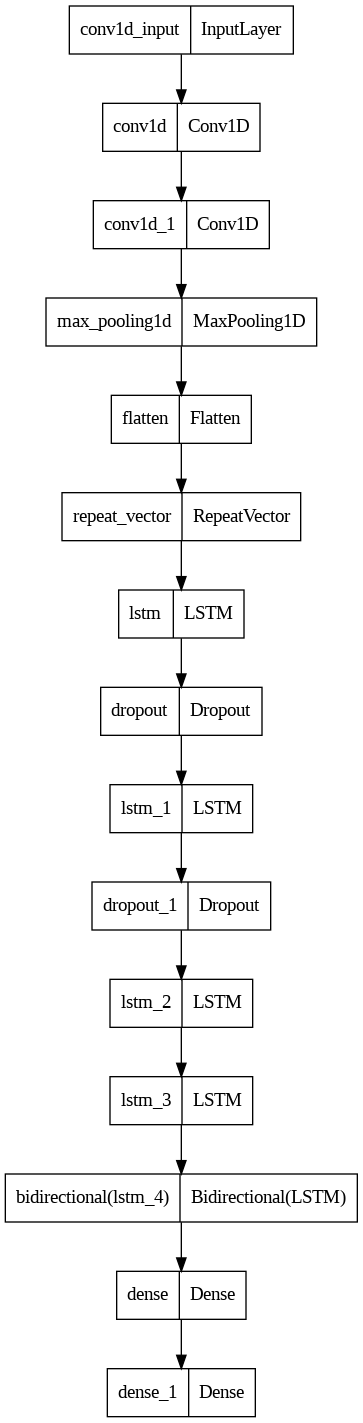

In [ ]:
plot_model(model, to_file='model.png')

In [ ]:
history = model.fit(x_train,y_train,epochs=30, verbose=1, callbacks = [early_stop] )

Epoch 1/30
18/18 [==============================] - 23s 661ms/step - loss: 0.1149
Epoch 2/30
18/18 [==============================] - 9s 501ms/step - loss: 0.0692
Epoch 3/30
18/18 [==============================] - 8s 444ms/step - loss: 0.0602
Epoch 4/30
18/18 [==============================] - 6s 312ms/step - loss: 0.0522
Epoch 5/30
18/18 [==============================] - 7s 380ms/step - loss: 0.0446
Epoch 6/30
18/18 [==============================] - 7s 364ms/step - loss: 0.0403
Epoch 7/30
18/18 [==============================] - 6s 315ms/step - loss: 0.0373
Epoch 8/30
18/18 [==============================] - 8s 427ms/step - loss: 0.0358
Epoch 9/30
18/18 [==============================] - 6s 314ms/step - loss: 0.0344
Epoch 10/30
18/18 [==============================] - 9s 537ms/step - loss: 0.0337
Epoch 11/30
18/18 [==============================] - 6s 315ms/step - loss: 0.0373
Epoch 12/30
18/18 [==============================] - 8s 445ms/step - loss: 0.0293
Epoch 13/30
18/18 [=====

In [ ]:
model.save("./regressor.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 2s 76ms/step


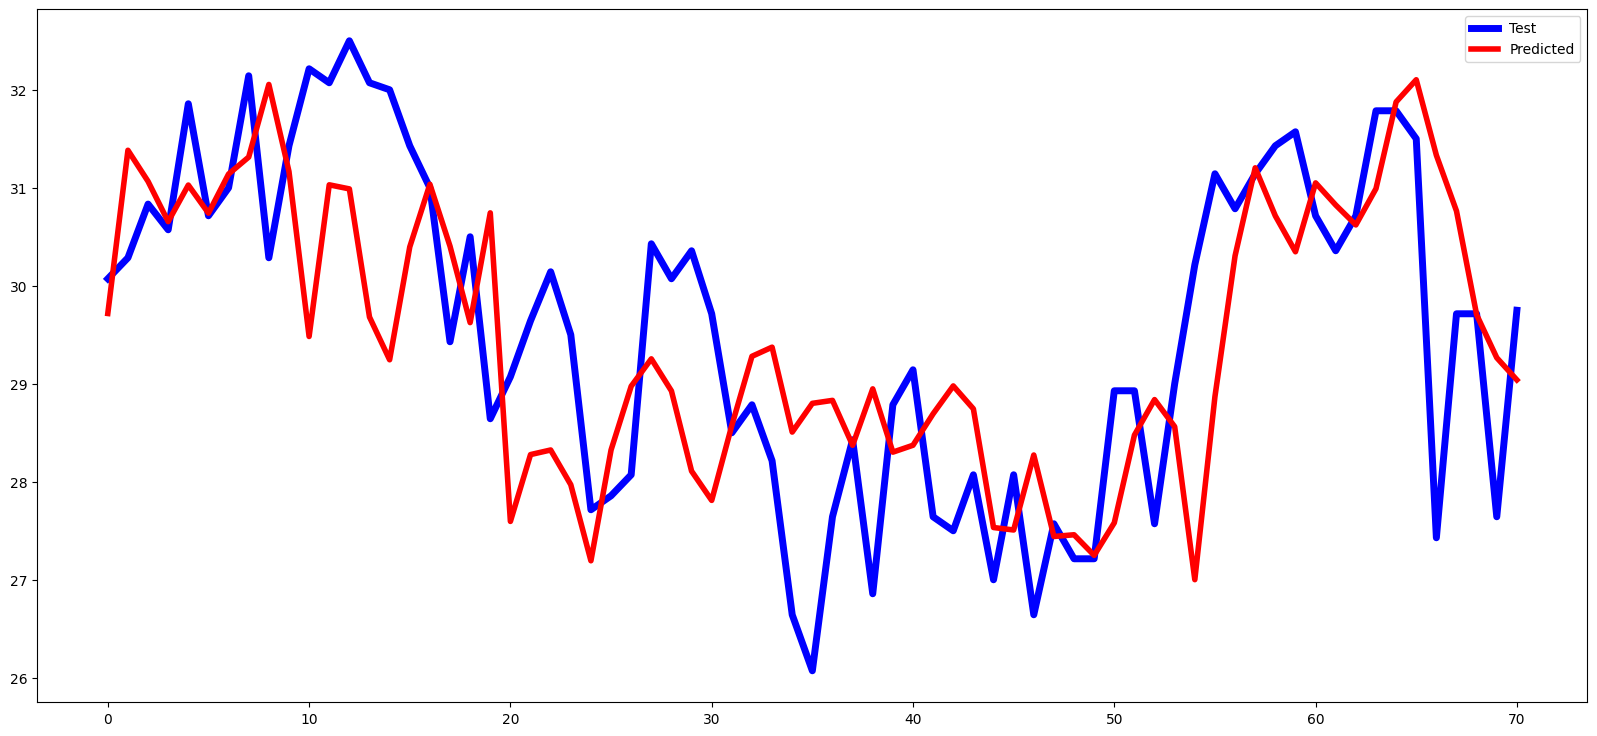

In [ ]:
predict = model.predict(x_test)
predict = scalar.inverse_transform(predict)
Ytesting = scalar.inverse_transform(y_test)
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

1.8064939057702971